In [229]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import pandas as pd

In [230]:
base_path = './bci_hackathon_data'

In [231]:
subject_1_1 = os.path.join(base_path, 'subject_1_fvep_led_training_1.EDF')
subject_1_2 = os.path.join(base_path, 'subject_1_fvep_led_training_2.EDF')
subject_2_1 = os.path.join(base_path, 'subject_2_fvep_led_training_1.EDF')
subject_2_2 = os.path.join(base_path, 'subject_2_fvep_led_training_2.EDF')
subject_1_1_mat = os.path.join(base_path, 'subject_1_fvep_led_training_1.mat')
subject_1_2_mat = os.path.join(base_path, 'subject_1_fvep_led_training_2.mat')
subject_2_1_mat = os.path.join(base_path, 'subject_2_fvep_led_training_1.mat')
subject_2_2_mat = os.path.join(base_path, 'subject_2_fvep_led_training_2.mat')

In [232]:
with h5py.File(subject_1_1_mat, 'r') as f:
    data = f['y'][:]

In [233]:
df = pd.DataFrame(data)

In [234]:
df['diff'] = df[9].diff()

In [235]:
df['diff'].value_counts()

diff
 0.0    57687
 1.0       20
-1.0       20
Name: count, dtype: int64

In [236]:
start_indices = df[df['diff'] == 1].index
end_indices = df[df['diff'] == -1].index

In [237]:
for s, e in zip(start_indices, end_indices):
    print(s, e)

2560 4442
5248 7130
7936 9818
10624 12506
13312 15194
16000 17882
18688 20570
21376 23258
24064 25946
26752 28634
29440 31322
32128 34010
34816 36698
37504 39386
40192 42074
42880 44762
45568 47450
48256 50138
50944 52826
53632 55514


In [238]:
trial_idx = 6
raw_9hz_df = df.iloc[start_indices[trial_idx]:end_indices[trial_idx], 1:9]
raw_9hz_df

,1,2,3,4,5,6,7,8
18688,-9.761308,-5.419656,-6.525570,-10.185130,-11.381863,-6.582593,-5.807102,-12.049568
18689,-5.446888,-0.996504,2.173340,-3.319980,-7.053034,-0.847949,1.193600,-5.529585
18690,-4.579743,-2.403066,3.552592,-2.024477,-5.650099,0.288209,2.480049,-2.937842
18691,-13.132401,-10.963913,-5.115693,-10.071596,-12.555448,-6.959975,-5.432268,-9.738366
18692,-23.007153,-18.117605,-14.497631,-18.374794,-20.393265,-14.209676,-13.193246,-17.725029
...,...,...,...,...,...,...,...,...
20565,5.258300,6.561225,13.331185,13.516370,5.713979,8.725896,10.799015,7.838394
20566,3.327588,6.772262,11.785227,13.981996,5.825716,6.952328,10.523547,8.966465
20567,2.786803,6.117500,9.431127,12.253078,4.448671,3.814339,8.519041,7.095854
20568,3.381084,4.354406,8.311323,8.845022,3.051525,2.566933,6.573844,4.014875


In [239]:
raw_9hz = mne.io.RawArray(raw_9hz_df.T, info=mne.create_info(8, 256, 'eeg')).rescale(1e-6)
raw_9hz

<RawArray | 8 x 1882 (7.4 s), ~130 KiB, data loaded>

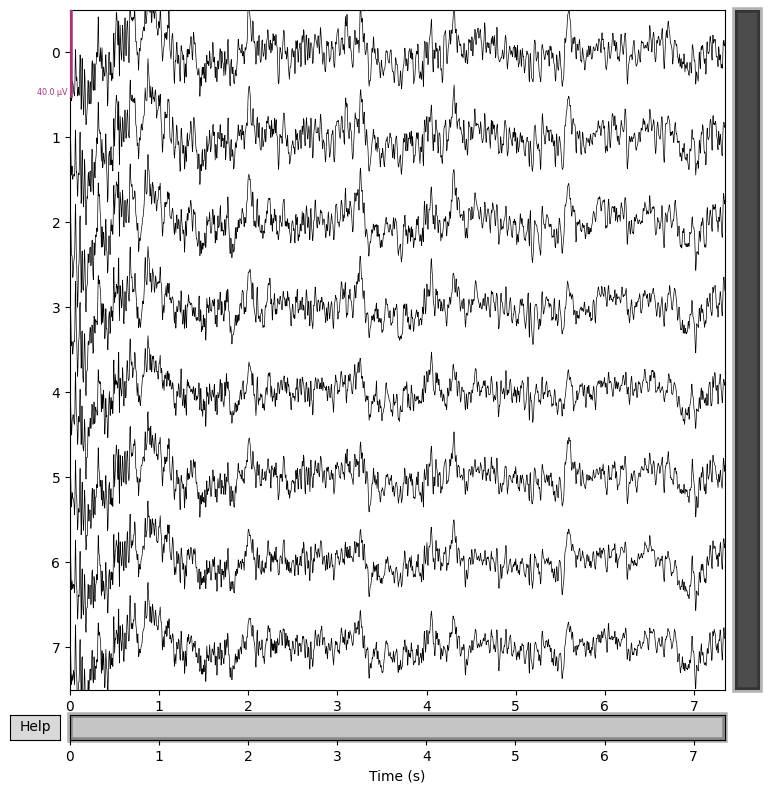

In [240]:
raw_9hz.plot()
plt.show()

/Users/luka/PycharmProjects/bci-game-server/.venv/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


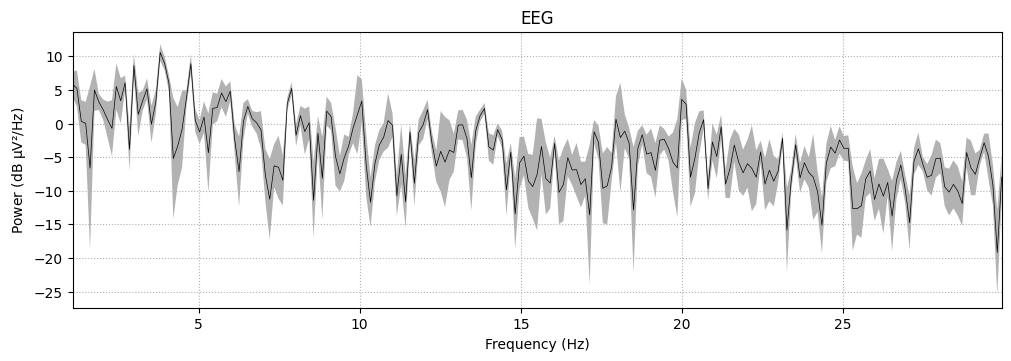

In [241]:
raw_9hz.compute_psd(fmin=1, fmax=30).plot(average=True)
plt.show()

/Users/luka/PycharmProjects/bci-game-server/.venv/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


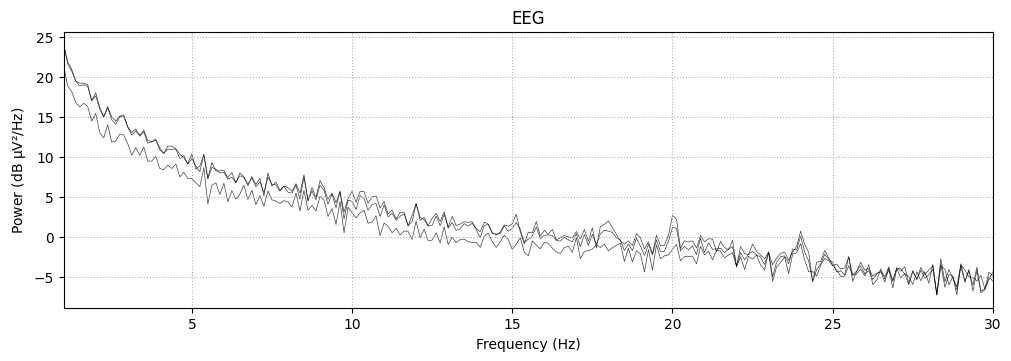

In [246]:
raw_all = mne.io.RawArray(df.iloc[:, 1:9].T, info=mne.create_info(8, 256, 'eeg')).rescale(1e-6)
raw_all.compute_psd(fmin=1, fmax=30).plot(average=False)
plt.show()

In [242]:
# raw = mne.io.read_raw_edf(subject_1_1)